Name:- Sourabh Solanki
Batch:- DS2403

In [179]:
#Red Wine Quality Prediction Project

# Project Description
The dataset is related to red and white variants of the Portuguese &quot;Vinho Verde&quot; wine. Due to privacy and
logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there
is no data about grape types, wine brand, wine selling price, etc.).
This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there
are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are
relevant. So it could be interesting to test feature selection methods.



# Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable
(wine quality) at e.g. 7 or higher getting classified as &#39;good/1&#39; and the remainder as &#39;not good/0&#39;.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at
the ROC curve and the AUC value.
You need to build a classification model.

In [180]:
# First Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [181]:
#load Data set
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [182]:
#checking first 20 Headings
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [183]:
#cheking Last 20 Data
df.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


Lets Exploratory Data Analysis(EDA)

In [184]:
#cheking Coloumns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [185]:
#cheking dimension of data set
df.shape

(1599, 12)

In [186]:
#now check the data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [187]:
#cheking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [188]:
#cheking data ser
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [189]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now here the target is "Quality"

In [190]:
#lets check the unique value of Quality columns
df["quality"].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [191]:
# lets check the value count of qaulity
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

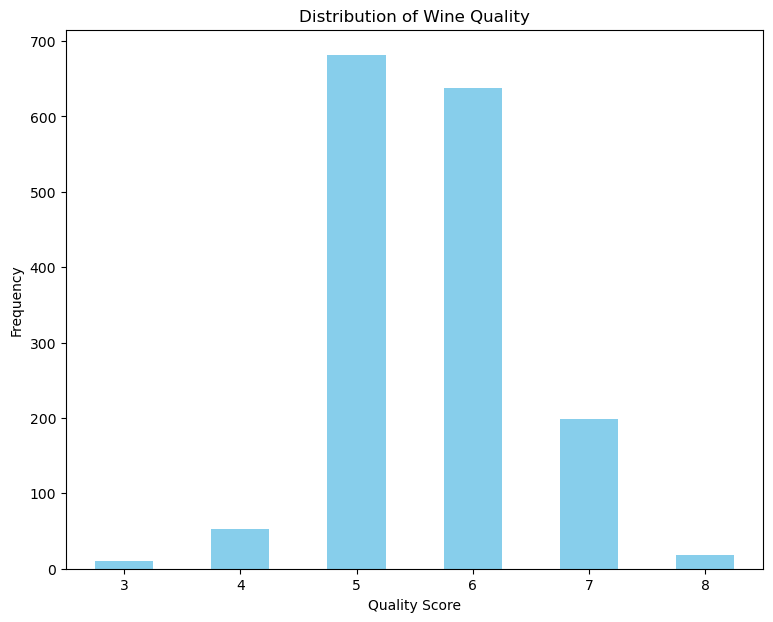

In [192]:
#Lets Examine the distribution of target Variable(Quality)
plt.figure(figsize=(9, 7))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [193]:
# Lets define Binary Classification Target
df['wine_quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [194]:
#now separate the features and target
X = df.drop(['quality', 'wine_quality'], axis=1)
y = df['wine_quality']

In [195]:
# Split the data into trainings and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Decision Tree Classifier

In [196]:
dt_classy= DecisionTreeClassifier(random_state=42)
dt_classy

DecisionTreeClassifier(random_state=42)

# Hyper Parameter

In [197]:

# Perform grid search for hyperparameter tuning
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}

grid_search = GridSearchCV(dt_classy, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.predict(X_test)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [198]:
#now Check the Acuuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
    

Accuracy: 0.8666666666666667


Confusion matrix

In [199]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[380  33]
 [ 31  36]]


In [200]:
#classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       413
           1       0.52      0.54      0.53        67

    accuracy                           0.87       480
   macro avg       0.72      0.73      0.73       480
weighted avg       0.87      0.87      0.87       480



ROC And AUC Calculate

In [201]:
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresolds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

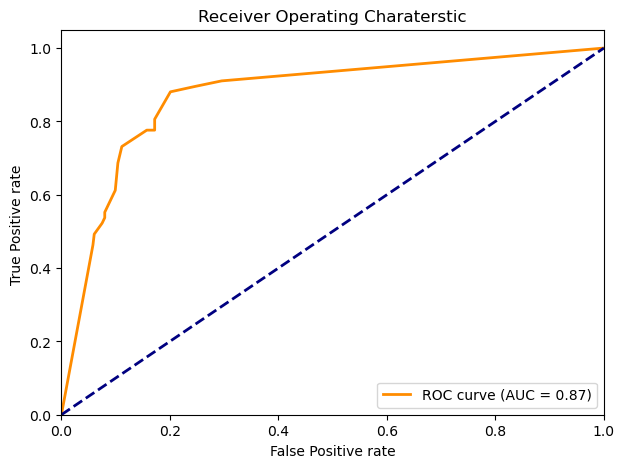

In [202]:
#ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Charaterstic')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate ')
plt.legend(loc="lower right")
plt.show()

    


# Logistic Regression Model

In [203]:
logreg= LogisticRegression(max_iter=1000, random_state=42)
#train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [204]:
y_pred = logreg.predict(X_test)

In [205]:
#evalute the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion Matrix")
print(cm)
print("Classification Report")
print(classification_report(y_test, y_pred))


Accuracy: 0.8645833333333334
confusion Matrix
[[398  15]
 [ 50  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.25      0.34        67

    accuracy                           0.86       480
   macro avg       0.71      0.61      0.63       480
weighted avg       0.84      0.86      0.84       480



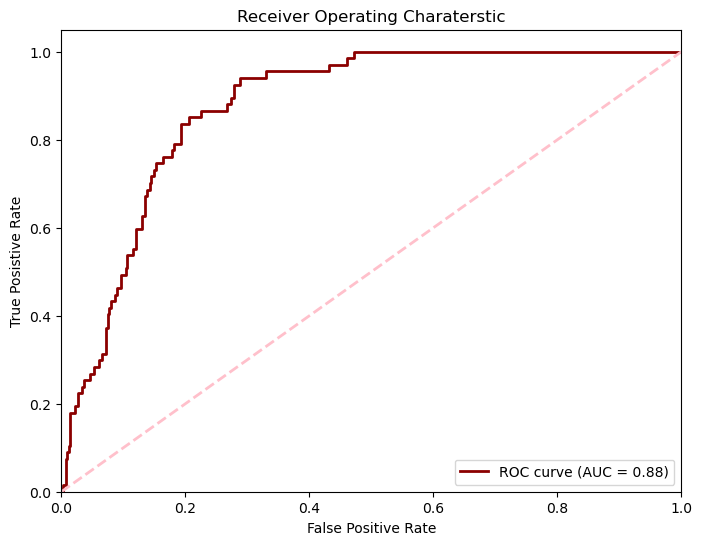

In [206]:
#Claculate ROC AND Auc Curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Charaterstic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Posistive Rate')
plt.legend(loc="lower right")
plt.show()

# Feature Selection

<function matplotlib.pyplot.show(close=None, block=None)>

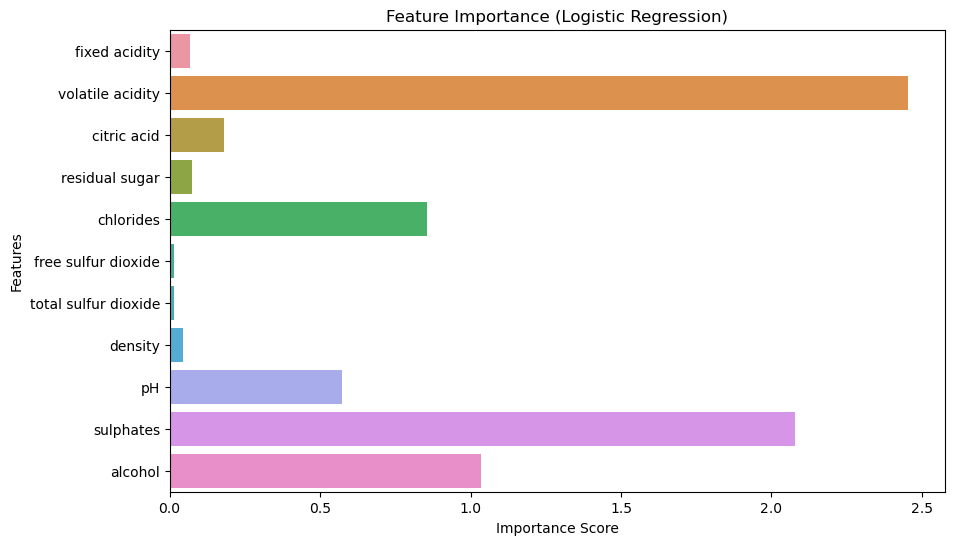

In [207]:
feature_importance = np.abs(logreg.coef_[0])
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

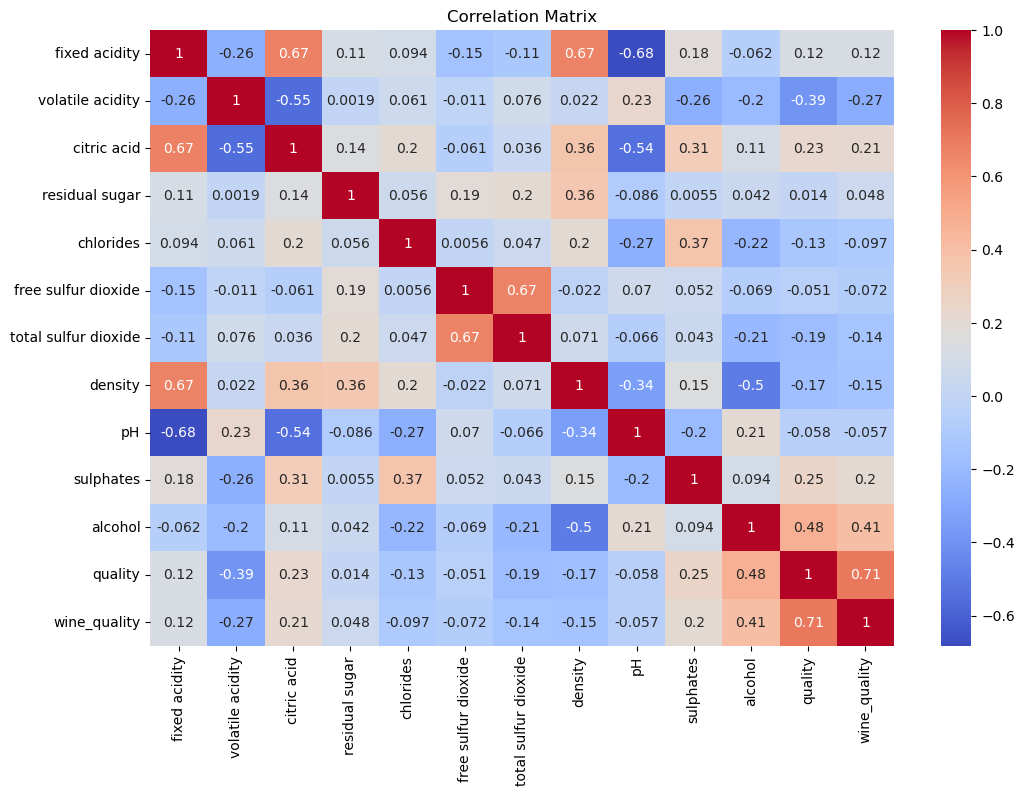

In [208]:
#Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show

# Thank You